In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## Cleaning and loading data

In [4]:
df = pd.read_csv('data/Dataset- (Data Science- Analytics).csv',keep_default_na=False, na_values=['NaN'])
df.isna().sum(),df.shape
headers = ["Week","Mob_Indic","Platform","Region","Origin_Country","Booking_Window_Group","Booking_Country","Booking_Cost","Net_Orders", "drop1","drop2"]
df.columns = headers
#df.drop(["Mob Indic","drop1","drop2"]) #Strangely this didnt work so instead I will make a subset
df = df[["Week","Mob_Indic","Platform","Region","Origin_Country","Booking_Window_Group","Booking_Country","Booking_Cost","Net_Orders"]]
#Currently the cost is not numerically shown so I will remove the '$'
df["Booking_Cost"] = df["Booking_Cost"].replace('[$,()-]', '', regex=True)
df["Booking_Cost"] = df["Booking_Cost"].str.strip()
df["Booking_Cost"] = pd.to_numeric(df["Booking_Cost"])



### Platform Analysis

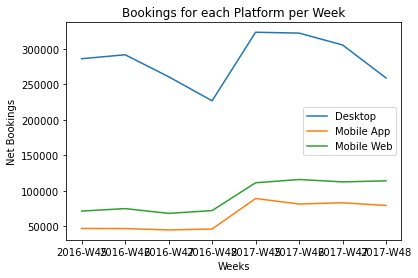

In [5]:
platforms = ['Desktop', 'Mobile App', 'Mobile Web']
for i in platforms:
    subset = df[df.Platform == i]
    weeks = subset.Week.unique()
    plt.plot(weeks, subset.groupby('Week')['Net_Orders'].sum(), label=i)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True 
plt.title('Bookings for each Platform per Week')
plt.xlabel("Weeks")
plt.ylabel("Net Bookings")
plt.legend()
plt.show()

### Region Analysis

['APAC' 'EMEA' 'LATAM' 'NA']


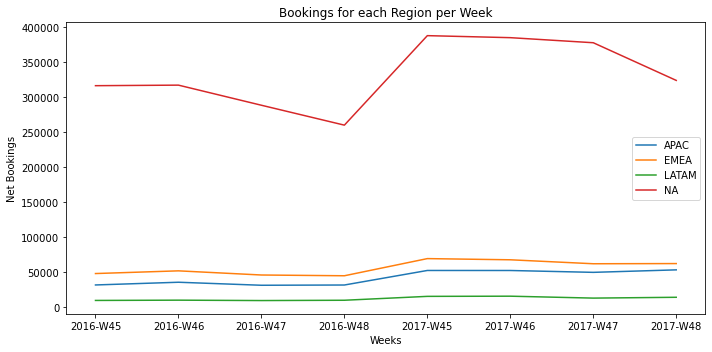

In [6]:
regions = df.Region.unique()
print(regions)
for i in regions:
    subset = df[df.Region == i]
    weeks = subset.Week.unique()
    plt.plot(weeks, subset.groupby('Week')['Net_Orders'].sum(), label=i)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True   
plt.title('Bookings for each Region per Week')
plt.xlabel("Weeks")
plt.ylabel("Net Bookings")
plt.legend()
plt.show()

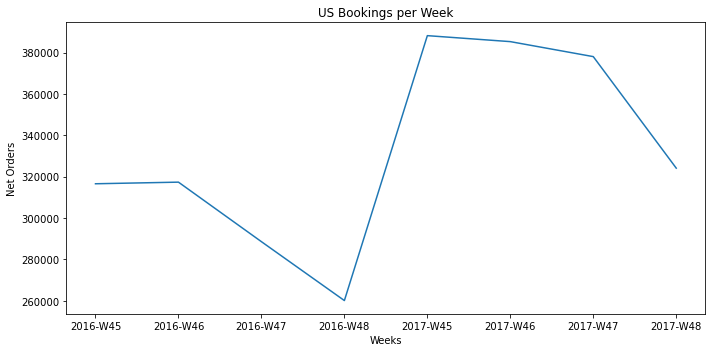

In [7]:
dfNA = df[df.Region =='NA']
weeks = subset.Week.unique()
plt.plot(weeks, dfNA.groupby('Week')['Net_Orders'].sum())
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True   
plt.title('US Bookings per Week')
plt.xlabel("Weeks")
plt.ylabel("Net Orders")
plt.show()

In [8]:
df.groupby('Region').sum()

,Booking_Cost,Net_Orders
Region,,
APAC,118087949.0,334209
EMEA,142651212.0,448450
LATAM,33886492.0,92620
NA,657900463.0,2658400


### Orders and Region Model

In [9]:
m = smf.ols('Net_Orders~Region',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     65.98
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.34e-42
Time:                        02:12:43   Log-Likelihood:            -6.1282e+05
No. Observations:               73688   AIC:                         1.226e+06
Df Residuals:                   73684   BIC:                         1.226e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.0394      6.415      2.188      0.029       1.465      26.614
Region[T.EMEA]      5.0622      9.104      0.556      0.578     -12.782      22.907
Region[T.LATAM]     1.0428     14.167      0.074      0.941     -26.724      28.810
Region[T.NA]      117.1424      9.461     12.382      0.000      98.600     135.685
==============================================================================
Omnibus:                   215553.975   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12224951643.285
Skew:                          41.301   Prob(JB):                         0.00
Kurtosis:                    1996.693   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Orders and Platform Model

The reference category in this model 

In [10]:
m = smf.ols('Net_Orders~Platform',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.33
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.26e-05
Time:                        02:12:43   Log-Likelihood:            -6.1291e+05
No. Observations:               73688   AIC:                         1.226e+06
Df Residuals:                   73685   BIC:                         1.226e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 64.9811      5.294     12.276      0.000      54.606      75.356
Platform[T.Mobile App]   -37.4881      8.961     -4.184      0.000     -55.051     -19.925
Platform[T.Mobile Web]   -27.7214      8.803     -3.149      0.002     -44.975     -10.468
==============================================================================
Omnibus:                   215696.748   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12258441630.797
Skew:                          41.377   Prob(JB):                         0.00
Kurtosis:                    1999.421   Cond. No.                         3.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Booking Cost and Window Model

In [11]:
m = smf.ols('Booking_Cost~Booking_Window_Group',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Booking_Cost   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.549
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           0.000204
Time:                        02:12:43   Log-Likelihood:            -9.9284e+05
No. Observations:               72643   AIC:                         1.986e+06
Df Residuals:                   72633   BIC:                         1.986e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.062e+04   2275.227      4.667      0.000    6158.309    1.51e+04
Booking_Window_Group[T.0-1 days]    1.084e+04   3142.797      3.448      0.001    4675.557     1.7e+04
Booking_Window_Group[T.15-30 days]  5729.8232   3169.185      1.808      0.071    -481.769    1.19e+04
Booking_Window_Group[T.2-3 days]    1079.4248   3268.209      0.330      0.741   -5326.255    7485.104
Booking_Window_Group[T.31-45 days]  1133.4240   3263.021      0.347      0.728   -5262.086    7528.933
Booking_Window_Group[T.4-7 days]    4395.8928   3255.186      1.350      0.177   -1984.260    1.08e+04
Booking_Window_Group[T.46-60 days] -2851.9788   3374.729     -0.845      0.398   -9466.436    3762.479
Booking_Window_Group[T.61-90 days] -4417.9160   3381.070     -1.307      0.191    -1.1e+04    2208.969
Booking_Window_Group[T.8-14 days]   3399.0019   3247.171      1.047      0.295   -2965.443    9763.447
Booking_Window_Group[T.Post Book]  -2954.3255   3.39e+04     -0.087      0.931   -6.94e+04    6.35e+04
==============================================================================
Omnibus:                   199359.916   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5927334921.665
Skew:                          34.974   Prob(JB):                         0.00
Kurtosis:                    1400.640   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Net Order and Window Model

In [12]:
m = smf.ols('Net_Orders~Booking_Window_Group',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.45
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.57e-16
Time:                        02:12:44   Log-Likelihood:            -6.1287e+05
No. Observations:               73688   AIC:                         1.226e+06
Df Residuals:                   73678   BIC:                         1.226e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             17.1176     10.726      1.596      0.111      -3.905      38.140
Booking_Window_Group[T.0-1 days]     113.8394     14.839      7.672      0.000      84.755     142.924
Booking_Window_Group[T.15-30 days]    33.7563     14.937      2.260      0.024       4.480      63.032
Booking_Window_Group[T.2-3 days]      32.9953     15.408      2.141      0.032       2.795      63.196
Booking_Window_Group[T.31-45 days]    12.1940     15.376      0.793      0.428     -17.943      42.331
Booking_Window_Group[T.4-7 days]      39.3922     15.332      2.569      0.010       9.342      69.443
Booking_Window_Group[T.46-60 days]    -0.9797     15.895     -0.062      0.951     -32.133      30.174
Booking_Window_Group[T.61-90 days]    -5.1253     15.940     -0.322      0.748     -36.368      26.117
Booking_Window_Group[T.8-14 days]     31.4977     15.300      2.059      0.040       1.511      61.485
Booking_Window_Group[T.Post Book]     48.2574    156.988      0.307      0.759    -259.438     355.953
==============================================================================
Omnibus:                   215544.348   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12190006466.026
Skew:                          41.298   Prob(JB):                         0.00
Kurtosis:                    1993.837   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Order and Region and Platform Model

In [13]:
m = smf.ols('Net_Orders~Region+Platform',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     44.49
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.29e-46
Time:                        02:12:44   Log-Likelihood:            -6.1281e+05
No. Observations:               73688   AIC:                         1.226e+06
Df Residuals:                   73682   BIC:                         1.226e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 33.1748      7.518      4.413      0.000      18.440      47.910
Region[T.EMEA]             3.7165      9.116      0.408      0.683     -14.150      21.583
Region[T.LATAM]           -1.9690     14.179     -0.139      0.890     -29.760      25.822
Region[T.NA]             117.3407      9.461     12.402      0.000      98.797     135.884
Platform[T.Mobile App]   -40.7617      8.965     -4.547      0.000     -58.334     -23.190
Platform[T.Mobile Web]   -30.1302      8.796     -3.426      0.001     -47.370     -12.891
==============================================================================
Omnibus:                   215538.467   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12218703952.629
Skew:                          41.293   Prob(JB):                         0.00
Kurtosis:                    1996.184   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cost and Region Model

In [14]:
m = smf.ols('Booking_Cost~Region',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Booking_Cost   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     83.93
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.33e-54
Time:                        02:12:45   Log-Likelihood:            -9.9273e+05
No. Observations:               72643   AIC:                         1.985e+06
Df Residuals:                   72639   BIC:                         1.986e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5030.5849   1359.819      3.699      0.000    2365.344    7695.826
Region[T.EMEA]   1113.4074   1928.368      0.577      0.564   -2666.188    4893.003
Region[T.LATAM]   562.1684   3002.164      0.187      0.851   -5322.063    6446.400
Region[T.NA]     2.804e+04   2007.782     13.967      0.000    2.41e+04     3.2e+04
==============================================================================
Omnibus:                   199218.117   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5912502071.696
Skew:                          34.907   Prob(JB):                         0.00
Kurtosis:                    1398.892   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Modeling for NA

In [15]:
m = smf.ols('Net_Orders~Region+Platform',data=dfNA).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.913
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           0.000997
Time:                        02:12:45   Log-Likelihood:            -1.8152e+05
No. Observations:               20265   AIC:                         3.631e+05
Df Residuals:                   20262   BIC:                         3.631e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                183.1096     19.601      9.342      0.000     144.690     221.529
Platform[T.Mobile App]  -112.9288     32.089     -3.519      0.000    -175.826     -50.032
Platform[T.Mobile Web]   -77.5583     31.853     -2.435      0.015    -139.992     -15.124
==============================================================================
Omnibus:                    45943.708   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        261238699.081
Skew:                          21.896   Prob(JB):                         0.00
Kurtosis:                     557.499   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
m = smf.ols('Net_Orders~Platform',data=dfNA).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.913
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           0.000997
Time:                        02:12:45   Log-Likelihood:            -1.8152e+05
No. Observations:               20265   AIC:                         3.631e+05
Df Residuals:                   20262   BIC:                         3.631e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                183.1096     19.601      9.342      0.000     144.690     221.529
Platform[T.Mobile App]  -112.9288     32.089     -3.519      0.000    -175.826     -50.032
Platform[T.Mobile Web]   -77.5583     31.853     -2.435      0.015    -139.992     -15.124
==============================================================================
Omnibus:                    45943.708   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        261238699.081
Skew:                          21.896   Prob(JB):                         0.00
Kurtosis:                     557.499   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
m = smf.ols('Net_Orders~Mob_Indic',data=dfNA).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.84
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           0.000339
Time:                        02:12:45   Log-Likelihood:            -1.8152e+05
No. Observations:               20265   AIC:                         3.631e+05
Df Residuals:                   20263   BIC:                         3.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             183.1096     19.601      9.342      0.000     144.690     221.529
Mob_Indic[T.Mobile]   -95.0343     26.517     -3.584      0.000    -147.009     -43.060
==============================================================================
Omnibus:                    45944.834   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        261281662.616
Skew:                          21.898   Prob(JB):                         0.00
Kurtosis:                     557.545   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
m = smf.ols('Net_Orders~Booking_Cost',data=dfNA).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Orders   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.847e+05
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:12:50   Log-Likelihood:            -1.5519e+05
No. Observations:               19892   AIC:                         3.104e+05
Df Residuals:                   19890   BIC:                         3.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.4582      4.209     -4.148      0.000     -25.709      -9.208
Booking_Cost     0.0046   1.06e-05    429.744      0.000       0.005       0.005
==============================================================================
Omnibus:                    28368.874   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        161384698.172
Skew:                           7.402   Prob(JB):                         0.00
Kurtosis:                     444.015   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Booking Cost')

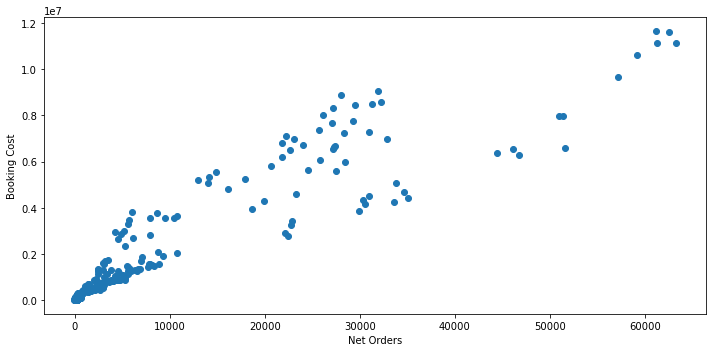

In [19]:
plt.scatter(dfNA.Net_Orders, dfNA.Booking_Cost)
plt.xlabel("Net Orders")
plt.ylabel("Booking Cost")

In [20]:
sizes = df.groupby('Region').size()
sums = df.groupby('Region').sum()['Net_Orders']
print(sizes, sums)

Region
APAC     23805
EMEA     23477
LATAM     6141
NA       20265
dtype: int64 Region
APAC      334209
EMEA      448450
LATAM      92620
NA       2658400
Name: Net_Orders, dtype: int64


In [21]:
df.groupby('Region').mean()

,Booking_Cost,Net_Orders
Region,,
APAC,5030.584860,14.039445
EMEA,6143.992247,19.101674
LATAM,5592.753260,15.082234
NA,33073.620702,131.181841


### Cancelled Bookings

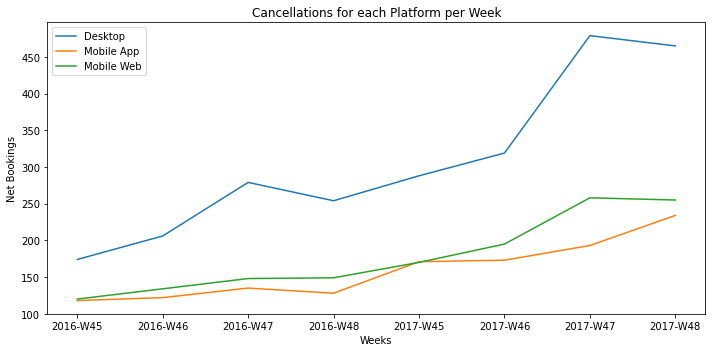

In [34]:
#cancelled = df[df.Net_Orders < 0 ].groupby('Week')['Net_Orders'].sum()
platforms = ['Desktop', 'Mobile App', 'Mobile Web']
for i in platforms:
    subset = df[df.Platform == i]
    cancelled = subset[subset.Net_Orders < 0 ]
    weeks = subset.Week.unique()
    plt.plot(weeks, -1.0*cancelled.groupby('Week')['Net_Orders'].sum(), label=i)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True 
plt.title('Cancellations for each Platform per Week')
plt.xlabel("Weeks")
plt.ylabel("Net Bookings")
plt.legend()
plt.show()